<a href="https://colab.research.google.com/github/namigabbasov/Text-Analysis-and-NLP/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

This notebook will walk you through three different ways to analyze the sentiment of text:

1. Lexicon-Based Analysis: This method uses dictionaries of positive and negative words to figure out the sentiment of a sentence or document.
2. Machine Learning-Based Analysis: Here, we will use traditional machine learning models combined with text features to predict sentiment.
3. Transformer Models: Finally, we will explore powerful, cutting-edge models from Hugging Face (like BERT) to get highly accurate results.


The tutorial starts with basics of sentiment analysis and then moves to two case studies. By the end of this tutorial, you will know how to use each method and see how they compare, so you can pick the right approach for your own projects!

In [ ]:
!pip install datasets transformers huggingface_hub torch scikit-learn
!apt-get install git-lfs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

##  **I.Sentiment Analysis Lexicon-based Approaches**

## 1. Install Dependencies and Download VADER lexicon




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
### Install Libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

### Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 2. Explore VADER lexicon

In [ ]:
### initialize VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

### access lexicon dictionary
vader_lexicon = sid.lexicon

### print a sample of the lexicon
list(vader_lexicon.items())[:10000]

[('$:', -1.5),
 ('%)', -0.4),
 ('%-)', -1.5),
 ('&-:', -0.4),
 ('&:', -0.7),
 ("( '}{' )", 1.6),
 ('(%', -0.9),
 ("('-:", 2.2),
 ("(':", 2.3),
 ('((-:', 2.1),
 ('(*', 1.1),
 ('(-%', -0.7),
 ('(-*', 1.3),
 ('(-:', 1.6),
 ('(-:0', 2.8),
 ('(-:<', -0.4),
 ('(-:o', 1.5),
 ('(-:O', 1.5),
 ('(-:{', -0.1),
 ('(-:|>*', 1.9),
 ('(-;', 1.3),
 ('(-;|', 2.1),
 ('(8', 2.6),
 ('(:', 2.2),
 ('(:0', 2.4),
 ('(:<', -0.2),
 ('(:o', 2.5),
 ('(:O', 2.5),
 ('(;', 1.1),
 ('(;<', 0.3),
 ('(=', 2.2),
 ('(?:', 2.1),
 ('(^:', 1.5),
 ('(^;', 1.5),
 ('(^;0', 2.0),
 ('(^;o', 1.9),
 ('(o:', 1.6),
 (")':", -2.0),
 (")-':", -2.1),
 (')-:', -2.1),
 (')-:<', -2.2),
 (')-:{', -2.1),
 ('):', -1.8),
 ('):<', -1.9),
 ('):{', -2.3),
 (');<', -2.6),
 ('*)', 0.6),
 ('*-)', 0.3),
 ('*-:', 2.1),
 ('*-;', 2.4),
 ('*:', 1.9),
 ('*<|:-)', 1.6),
 ('*\\0/*', 2.3),
 ('*^:', 1.6),
 (',-:', 1.2),
 ("---'-;-{@", 2.3),
 ('--<--<@', 2.2),
 ('.-:', -1.2),
 ('..###-:', -1.7),
 ('..###:', -1.9),
 ('/-:', -1.3),
 ('/:', -1.3),
 ('/:<', -1.4),

In [ ]:
### get sentiment score for specific word
word = "sad"
score = vader_lexicon.get(word)
print(f"Sentiment score for '{word}': {score}")

Sentiment score for 'sad': -2.1


## 3. Conduct Sentiment Analysis with VADER sentiment analyzer



In [ ]:
### initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

### example sentences
sentences = [
    "I absolutely love this product! It works perfectly.",
    "This was a terrible experience, I would not recommend it to anyone.",
    "The service was okay, not great but not bad either.",
    "Wow, what an amazing day!",
    "I don't think I will buy this again."
]


### analyze each sentence
for sentence in sentences:
    sentiment_scores = sia.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment Scores: {sentiment_scores}\n")

### compound: normalized score rangin from -1 to +1

Sentence: I absolutely love this product! It works perfectly.
Sentiment Scores: {'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.8746}

Sentence: This was a terrible experience, I would not recommend it to anyone.
Sentiment Scores: {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.6381}

Sentence: The service was okay, not great but not bad either.
Sentiment Scores: {'neg': 0.149, 'neu': 0.487, 'pos': 0.364, 'compound': 0.4728}

Sentence: Wow, what an amazing day!
Sentiment Scores: {'neg': 0.0, 'neu': 0.275, 'pos': 0.725, 'compound': 0.8356}

Sentence: I don't think I will buy this again.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



## 4. Explore Sentiment Distribution and Aspect Analysis

In [ ]:
### Function to preprocess sentences
def preprocess_text(text):
    text = re.sub(r"\b(can't|cannot|don't|didn't|won't|shouldn't|isn't)\b", "not", text)
    return text

### Function to classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

### Define list of aspects to check in sentences
aspects = ['product', 'experience', 'service', 'camera', 'battery', 'support', 'shipping']

### Initialize a list to store results
results = []

### analyze each sentence
for sentence in sentences:
    processed_sentence = preprocess_text(sentence)
    sentiment_scores = sia.polarity_scores(processed_sentence)
    sentiment = classify_sentiment(sentiment_scores['compound'])

    ### identify aspects mentioned in the sentence
    aspect_sentiments = {}
    for aspect in aspects:
        if aspect in processed_sentence.lower():
            ### extract sentiment score specific to aspect
            aspect_sentiments[aspect] = sentiment_scores['compound']

    ### add results to list
    results.append({
        'Sentence': sentence,
        'Processed Sentence': processed_sentence,
        'Compound Score': sentiment_scores['compound'],
        'Sentiment': sentiment,
        'Aspect Sentiments': aspect_sentiments
    })

### convert results to a DataFrame for easier analysis
df_results = pd.DataFrame(results)
df_results

,Sentence,Processed Sentence,Compound Score,Sentiment,Aspect Sentiments
0,I absolutely love this product! It works perfe...,I absolutely love this product! It works perfe...,0.8746,Positive,{'product': 0.8746}
1,"This was a terrible experience, I would not re...","This was a terrible experience, I would not re...",-0.6381,Negative,{'experience': -0.6381}
2,"The service was okay, not great but not bad ei...","The service was okay, not great but not bad ei...",0.4728,Positive,{'service': 0.4728}
3,"Wow, what an amazing day!","Wow, what an amazing day!",0.8356,Positive,{}
4,I don't think I will buy this again.,I not think I will buy this again.,0.0000,Neutral,{}


<ipython-input-7-39142b5822a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_results, x='Sentiment', palette='viridis')


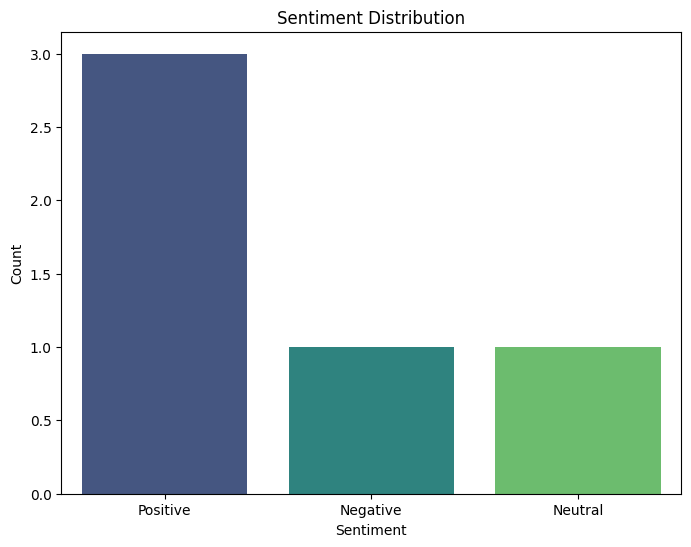

In [ ]:
### Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_results, x='Sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Aspect Sentiment Heatmap

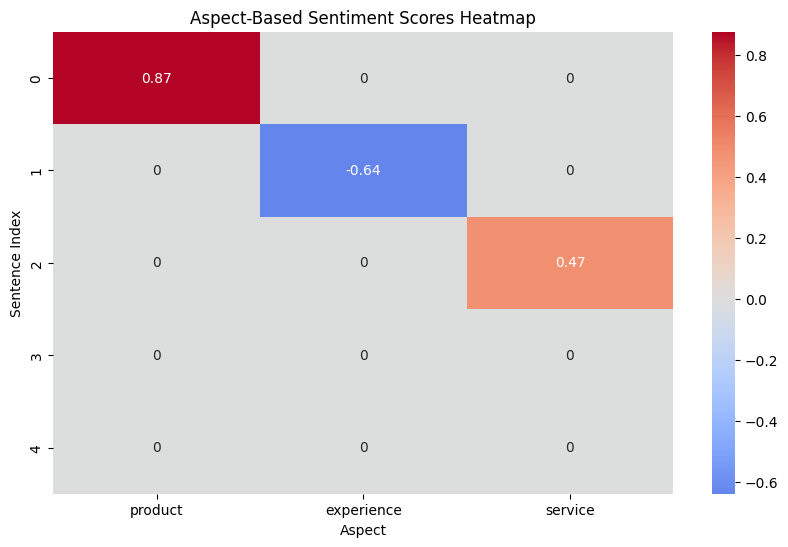

In [ ]:
### Prepare data for heatmap by converting aspect sentiments to DataFrame
aspect_data = pd.DataFrame(df_results['Aspect Sentiments'].tolist()).fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(aspect_data, annot=True, cmap='coolwarm', center=0)
plt.title("Aspect-Based Sentiment Scores Heatmap")
plt.xlabel("Aspect")
plt.ylabel("Sentence Index")
plt.show()

# **III. Sentiment Analysis with Machine Learning**

### 1. Load Data

In [ ]:
from datasets import load_dataset

### Load Amazon Polarity dataset
dataset = load_dataset("amazon_polarity")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 3600000
    })
    test: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 400000
    })
})

## 2. Explore Dataset

In [ ]:
### extract train data
train_texts = dataset["train"].shuffle(seed=42).select(range(10000))["content"]
train_labels = dataset["train"].shuffle(seed=42).select(range(10000))["label"]

### extract train data
test_texts = dataset["test"].shuffle(seed=42).select(range(1000))["content"]
test_labels = dataset["test"].shuffle(seed=42).select(range(1000))["label"]

### display sample of subset
print("Training Text Sample:", train_texts[:1])
print("Training Label Sample:", train_labels[:1])
print("Test Text Sample:", test_texts[:1])
print("Test Label Sample:", test_labels[:1])


Training Text Sample: ["All the pretty people in this film. Even the Rudy character played by Michael Madsen. This is adapted from a Jim Thompson novel for cryin' out loud! These are supposed to be marginal characters, not fashion models. Though McQueen and McGraw were attractive (but check out McQueen's crummy prison haircut) they were believable in the role. Baldwin and Bassinger seem like movie stars trying to act like hard cases. Action wise, the robbery scene in the Pekinpah version was about 100 times more exciting and suspenseful than anything in this re-make."]
Training Label Sample: [0]
Test Text Sample: ['The product works fine. I ordered the more exprensive one after I read reviews from others on Amazon. My husband likes the presser. It does a good job pressing his pants. However, it was damaged in the box when we received it. We decided it was too much trouble to send it back. The box was torn and the presser had a chuck knocked out of it.']
Test Label Sample: [1]


## 3. Preprocessing Text Data

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

### define custom tokenizer for full preprocessing
def custom_tokenizer(text):
    text = text.lower()
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.split()

### initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english", tokenizer=custom_tokenizer, lowercase=False)

### fit and transform training data, and transform test data
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import pandas as pd


### Convert TF-IDF matrix to dense format and create DataFrame
X_train_dense = X_train.toarray()  # Convert sparse matrix to dense array
df_tfidf = pd.DataFrame(X_train_dense, columns=vectorizer.get_feature_names_out())

### Display the first few rows of the DataFrame
df_tfidf

,aa,abc,abilities,ability,able,absent,absolute,absolutely,absorb,abstract,...,youve,yr,yrs,zen,zero,zipper,zombie,zombies,zone,zoom
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.147806,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Develop Machine Learning Models

1. Logistic Regression
2. Support Vector Machines
3. Naive Bayes model
4. Model Optimization

### 4.1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, train_labels)

### predict on test set
lr_predictions = lr_model.predict(X_test)

### Evaluate Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(test_labels, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(test_labels, lr_predictions))

Logistic Regression Accuracy: 0.827
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       487
           1       0.82      0.84      0.83       513

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



### 4.2: Support Vector Machines

In [ ]:
from sklearn.svm import SVC

### initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, train_labels)

### predict on test set
svm_predictions = svm_model.predict(X_test)

### evaluate SVM model
print("SVM Accuracy:", accuracy_score(test_labels, svm_predictions))
print("SVM Classification Report:\n", classification_report(test_labels, svm_predictions))

SVM Accuracy: 0.834
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       487
           1       0.83      0.85      0.84       513

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



### 4.3. Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

### initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, train_labels)

### predict on test set
nb_predictions = nb_model.predict(X_test)

### evaluate Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(test_labels, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(test_labels, nb_predictions))

Naive Bayes Accuracy: 0.811
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       487
           1       0.81      0.82      0.82       513

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



### 4.4. Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

### Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3)
grid_search.fit(X_train, train_labels)

### Display best parameters
print("Best parameters for Logistic Regression:", grid_search.best_params_)

optimized_lr_model = grid_search.best_estimator_

Best parameters for Logistic Regression: {'C': 1}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

### Predict on the test set
optimized_lr_predictions = optimized_lr_model.predict(X_test)
optimized_lr_probabilities = optimized_lr_model.predict_proba(X_test)[:, 1]


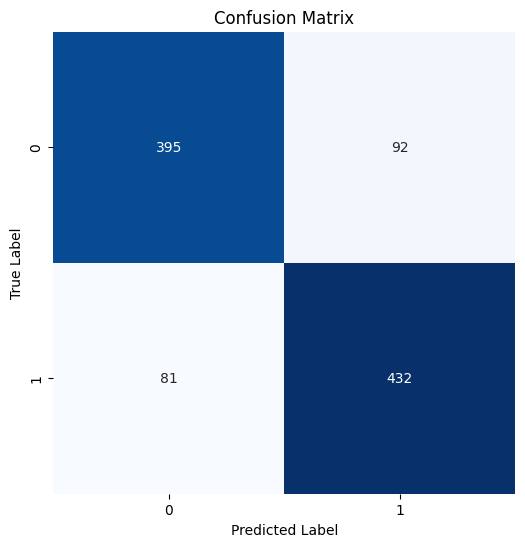

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

### generate confusion matrix
cm = confusion_matrix(test_labels, optimized_lr_predictions)

### plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

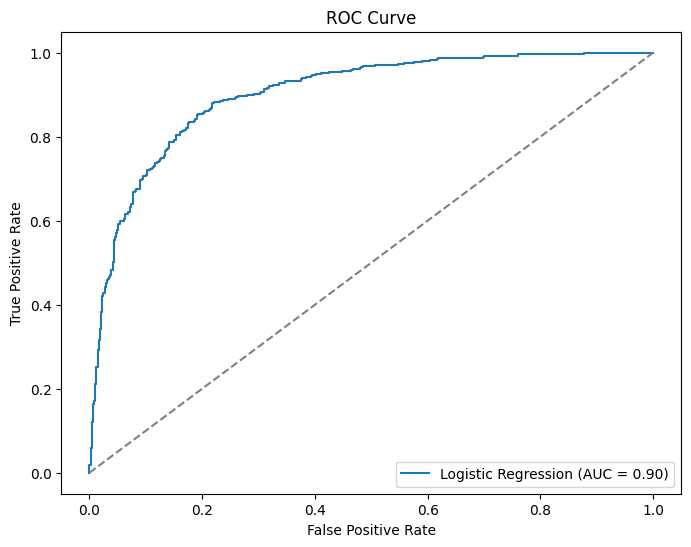

In [ ]:
from sklearn.metrics import roc_curve, auc

### calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(test_labels, optimized_lr_probabilities)
roc_auc = auc(fpr, tpr)

### plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

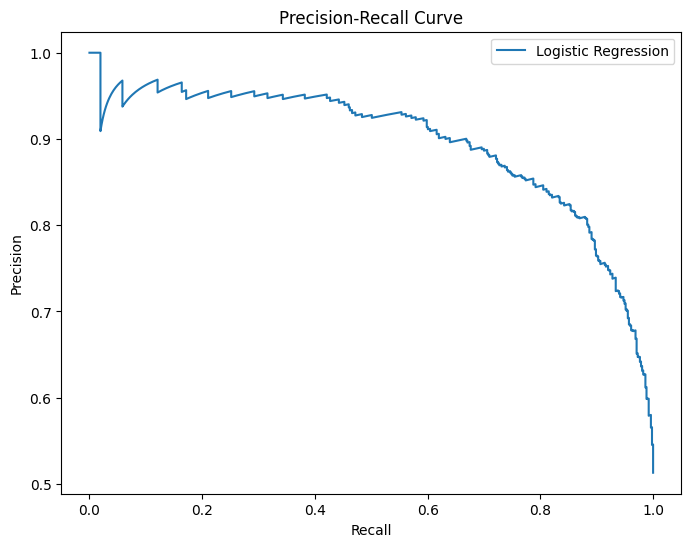

In [ ]:
from sklearn.metrics import precision_recall_curve

### calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, optimized_lr_probabilities)

### plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# **III. Sentiment Analysis with Deep Learning from Hugging Face Models**

## 1. Sentiment Analysis with Pipeline

In [ ]:
### Install dependencies

!pip install -q transformers
!pip install emoji==0.6.0

In [ ]:
### Sentiment Analysis with Pipeline without naming model

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [ ]:
### specify model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
sentiment_pipeline(data)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [ ]:
### Let's Use Multilingual sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
data = ["Esto es increíble",  "Es un producto aceptable", "No me gusta este producto"]
sentiment_pipeline(data)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': '5 stars', 'score': 0.6946435570716858},
 {'label': '4 stars', 'score': 0.42733249068260193},
 {'label': '1 star', 'score': 0.5042691826820374}]

In [ ]:
### Specify Spanish Sentiment Analysis Model
sentiment_pipeline = pipeline("sentiment-analysis", model="pysentimiento/robertuito-sentiment-analysis")
data = ["Esto es increíble", "No me gusta este producto"]
sentiment_pipeline(data)


### https://huggingface.co/pysentimiento/robertuito-sentiment-analysis

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'NEG', 'score': 0.5145782232284546},
 {'label': 'NEG', 'score': 0.9302881360054016}]

In [ ]:
### Let's Use Another Model for Spanish
sentiment_pipeline = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")
data = ["Esto es increíble", "No me gusta este producto"]
sentiment_pipeline(data)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POS', 'score': 0.9927613735198975},
 {'label': 'NEG', 'score': 0.9987087249755859}]

In [ ]:
### choose model for tweets
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
data = ["I love you", "I hate you"]
specific_model(data)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POS', 'score': 0.9916695356369019},
 {'label': 'NEG', 'score': 0.9806600213050842}]

In [ ]:
### model with emojis
specific_model = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")
data = ["I love 😊😊😊", "I hate you 😠😠😠"]
specific_model(data)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POS', 'score': 0.9921872615814209},
 {'label': 'NEG', 'score': 0.9819661378860474}]

In [ ]:
### For specific Area: Financial Analysis

from transformers import BertTokenizer, BertForSequenceClassification
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


##  2. Building Your Sentiment Analysis Model with Fine-tuning

### 2.1: Install Dependencies

In [ ]:
!pip install datasets transformers huggingface_hub torch scikit-learn
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


### 2.2: Import and Explore Data

In [ ]:
### load IMDB dataset
from datasets import load_dataset

dataset = load_dataset("imdb")

### subsample training and test sets
train_sample = dataset["train"].shuffle(seed=42).select(range(10000))
test_sample = dataset["test"].shuffle(seed=42).select(range(1000))

In [ ]:
dataset.shape

{'train': (25000, 2), 'test': (25000, 2), 'unsupervised': (50000, 2)}

In [ ]:
pd.DataFrame({'text':dataset['train'][:20]['text'],'label':dataset['train'][:20]['label']})

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
5,I would put this at the top of my list of film...,0
6,Whoever wrote the screenplay for this movie ob...,0
7,"When I first saw a glimpse of this movie, I qu...",0
8,"Who are these ""They""- the actors? the filmmake...",0
9,This is said to be a personal film for Peter B...,0


### 2.3. Load Tokenizer and Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

### load tokenizer and model
model_name = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 2.4: Preprocess Text Data

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

train_sample = train_sample.map(preprocess_function, batched=True)
test_sample = test_sample.map(preprocess_function, batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

###2.5. Define training arguments

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",             # Directory to save model checkpoints and logs
    evaluation_strategy="epoch",        # Evaluate at the end of each epoch
    learning_rate=2e-5,                 # Learning rate
    per_device_train_batch_size=8,      # Batch size for training
    per_device_eval_batch_size=8,       # Batch size for evaluation
    num_train_epochs=3,                 # Number of epochs
    weight_decay=0.01,                  # Weight decay for regularization
    logging_dir='./logs',               # Directory for logging
    logging_steps=10                    # Log every 10 steps
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### 2.6. Define Metric Function

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": accuracy, "f1": f1}

### 2.7. Initialize Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_sample,
    eval_dataset=test_sample,
    compute_metrics=compute_metrics
)

### 2.8.Train model

In [ ]:
trainer.train()

### you should get a quick API from https://wandb.ai/authorize

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: namigaabbasov (namigaabbasov-arizona-state-university). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.303400,0.353033,0.859000,0.859009
2,0.325800,0.455744,0.865000,0.865016
3,0.146300,0.564860,0.869000,0.869019


TrainOutput(global_step=3750, training_loss=0.2827906768878301, metrics={'train_runtime': 499.4206, 'train_samples_per_second': 60.07, 'train_steps_per_second': 7.509, 'total_flos': 993505489920000.0, 'train_loss': 0.2827906768878301, 'epoch': 3.0})

### 2.9. Evaluate Model

In [ ]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.5648595094680786, 'eval_accuracy': 0.869, 'eval_f1': 0.8690187352669673, 'eval_runtime': 3.6945, 'eval_samples_per_second': 270.675, 'eval_steps_per_second': 33.834, 'epoch': 3.0}


### 2.10. Make Predictions

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128, padding="max_length").to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = torch.argmax(predictions).item()
    return "positive" if sentiment == 1 else "negative"


print(predict_sentiment("This movie was fantastic!"))

positive


### 2.10. Plot Confusion Matrix

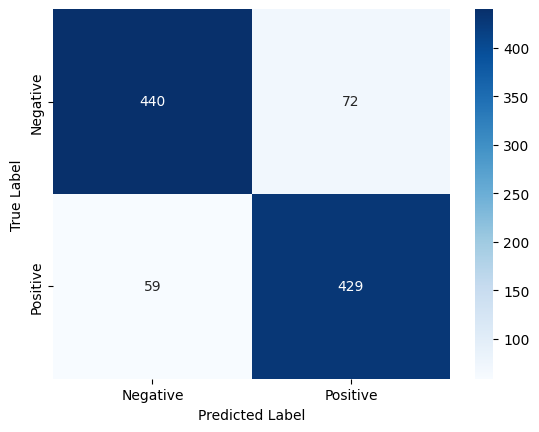

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Generate predictions on test set
predictions = trainer.predict(test_sample)
y_preds = predictions.predictions.argmax(axis=-1)
y_true = test_sample['label']

### plot confusion matrix
cm = confusion_matrix(y_true, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report (Precision, Recall, F1 Score)

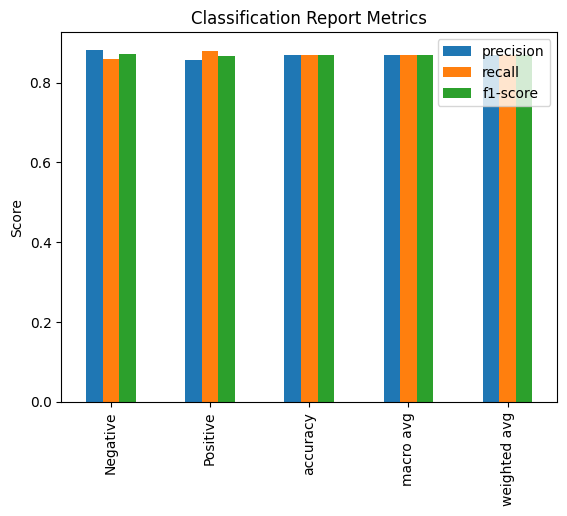

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

### generate classification report
report = classification_report(y_true, y_preds, target_names=['Negative', 'Positive'], output_dict=True)

### plot precision, recall, and F1
metrics_df = pd.DataFrame(report).T
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.show()

### ROC Curve and AUC

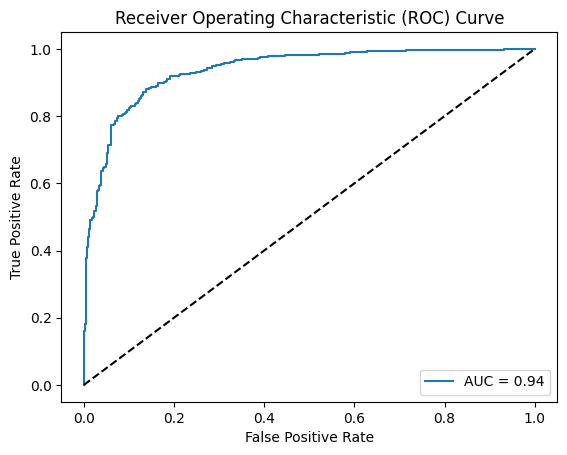

In [ ]:
from sklearn.metrics import roc_curve, auc

### get probability scores for positive class
y_probs = predictions.predictions[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

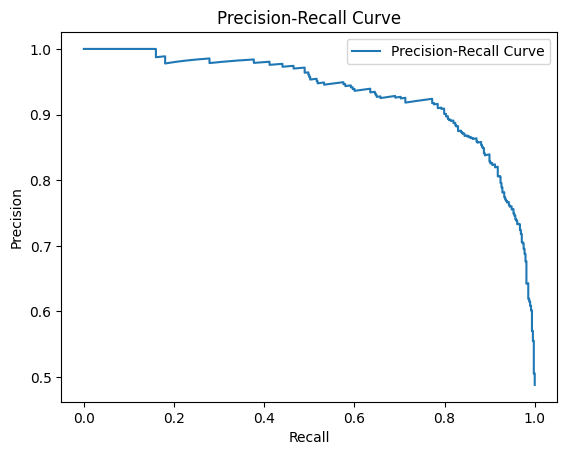

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Word Cloud of Misclassified Reviews

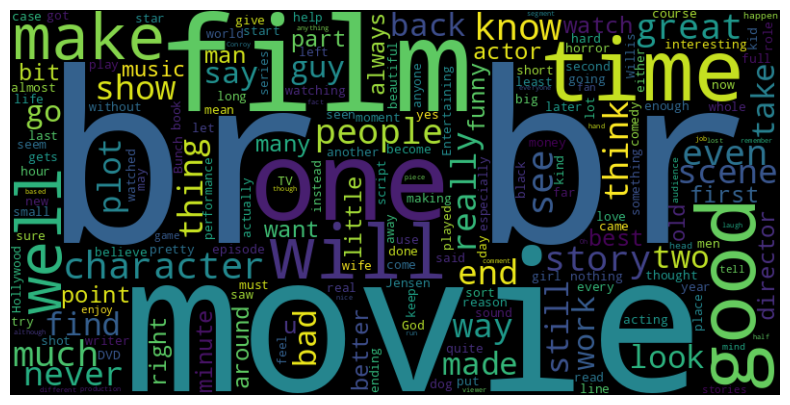

In [ ]:
from wordcloud import WordCloud

misclassified_texts = [test_sample[i]['text'] for i in range(len(y_true)) if y_true[i] != y_preds[i]]
misclassified_text = " ".join(misclassified_texts)

wordcloud = WordCloud(width=800, height=400).generate(misclassified_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Code Sources:

1. https://huggingface.co/blog/sentiment-analysis-python
2. https://medium.com/@manjindersingh_10145/sentiment-analysis-with-bert-using-huggingface-88e99deeec9a